In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

KIDNEY dataset Analysis

In [23]:
# A carefully curated collection of medical images tailored for spotting kidney stones 
# using advanced object detection methods. The dataset features various kidney stone 
# images from CT scans, covering different stone sizes, shapes, and positions within 
# the urinary system. Each image is accompanied by marked bounding boxes, making it 
# easier to pinpoint kidney stone locations. Researchers and medical professionals 
# can utilize this dataset to enhance object detection algorithms in medical imaging. 
# It's also a gateway to telemedicine innovations and the development of AI-powered 
# tools for better kidney stone diagnosis and treatment.

In [24]:
import os
def get_files(directory):
    return [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

In [25]:
# Example usage:
train = './kidney/train/images'
valid = './kidney/valid/images'
test = './kidney/test/images'
train_img = get_files(train)
print(f"The number of images use for trainning: \n{len(train_img)}")
val_img = get_files(valid)
print(f"The number of images use for validation:\n{len(val_img)}")
test_img = get_files(test)
print(f"The number of images use for testing:\n{len(test_img)}")


The number of images use for trainning: 
1054
The number of images use for validation:
123
The number of images use for testing:
123


Size of the image: (320, 391, 3)


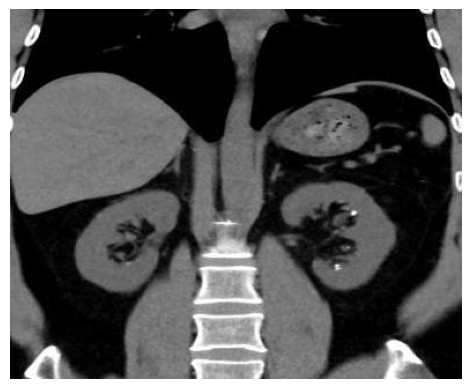

In [29]:


# Read the image from file
image = cv2.imread('./kidney/test/images/1-3-46-670589-33-1-63720209448267540500001-4892102259156693508_png_jpg.rf.cae7de5a8012ca6a47e1a58e5cf754ac.jpg')
print(f"Size of the image: {image.shape}")
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()


[[0.0, 0.7608695652173914, 0.55, 0.017902813299232736, 0.01875], [0.0, 0.7493606138107417, 0.64375, 0.01278772378516624, 0.0125], [0.0, 0.7237851662404092, 0.6921875, 0.020460358056265986, 0.0125], [0.0, 0.7250639386189258, 0.703125, 0.020460358056265986, 0.012]]


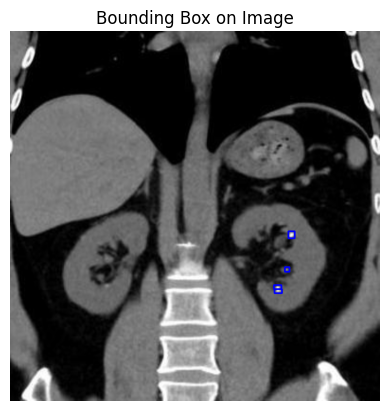

In [37]:
bbox = []
with open("./kidney/test/labels/1-3-46-670589-33-1-63720209448267540500001-4892102259156693508_png_jpg.rf.cae7de5a8012ca6a47e1a58e5cf754ac.txt") as f:
    for line in f.readlines():
        item = line.split(" ")
        temp = [float(item[num]) for num in range(len(item) -1)]
        temp.append(float(item[-1][:-1]))
        bbox.append(temp)
print(bbox)

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)
        
resized = resize_image(image)
shape = resized.shape
for bb in bbox:
    # Step 1: Convert normalized coordinates to pixel values
    # Calculate top-left corner coordinates
    x1 = int((bb[1] - bb[3] / 2) * shape[0])
    y1 = int((bb[2] - bb[4] / 2) * shape[0])
    x2 = int((bb[1] + bb[3] / 2) * shape[0])
    y2 = int((bb[2] + bb[4] / 2) * shape[0])

    # Step 3: Draw the bounding box on the image
    cv2.rectangle(resized, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw a red rectangle with thickness 2

    # Step 4: Display the image with the bounding box
plt.imshow(resized)
plt.axis('off')  # Turn off axis labels
plt.title('Bounding Box on Image')
plt.show()



Label analysis

In [7]:
train_labels = get_files("./kidney/train/labels")
with open(f"./kidney/train/labels/{train_labels[10]}") as f:
    for lines in f.readlines():
        print(lines)

0 0.32225063938618925 0.7484375 0.043478260869565216 0.0375

0 0.6304347826086957 0.6078125 0.03836317135549872 0.040625

0 0.3132992327365729 0.6203125 0.01278772378516624 0.009375

0 0.309462915601023 0.63125 0.01278772378516624 0.009375


- Each line contains a bounding box:
- Each bounding box contains: 
    +	1st number is the class id
    +	2nd and 3rd numbers are the coordinate(scale [0, 1]) of the midpoint
    +	4th and 5th numbers are the width and height of the bounding box


Plot histogram of midpoint cordinate

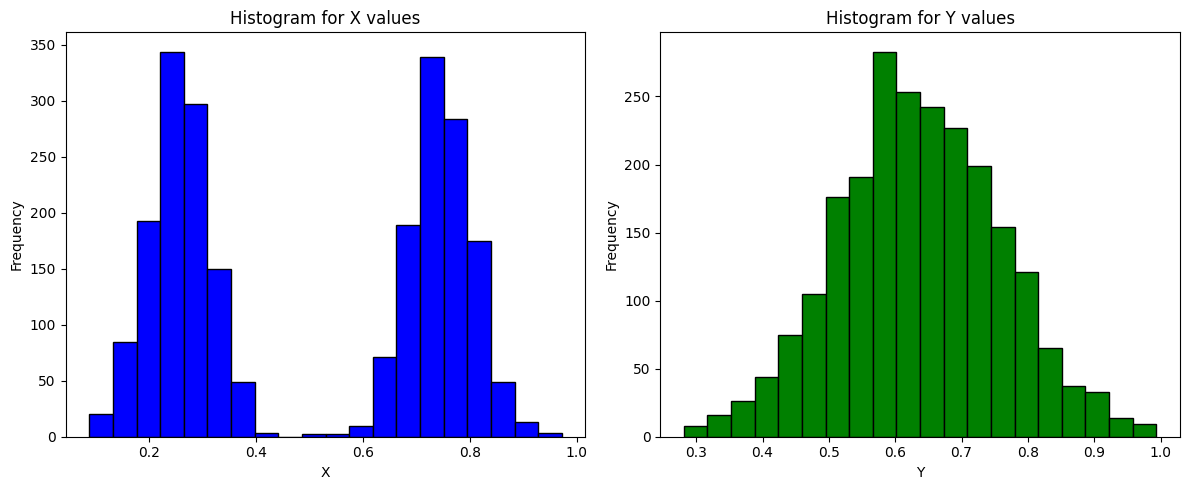

In [8]:


# Function to extract the x and y values from each YOLO dataset file
def extract_x_y_from_yolo(file_path):
    x_values = []
    y_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # Split each line by space
            values = line.strip().split()
            # Extract x and y (second and third elements)
            x = float(values[1])
            y = float(values[2])
            x_values.append(x)
            y_values.append(y)
    
    return x_values, y_values

# Function to extract data from multiple files
def extract_from_multiple_files(file_list):
    all_x_values = []
    all_y_values = []
    
    for file_path in file_list:
        x_values, y_values = extract_x_y_from_yolo(file_path)
        all_x_values.extend(x_values)
        all_y_values.extend(y_values)
    
    return all_x_values, all_y_values

# Function to plot histograms for aggregated x and y values
def plot_histograms(x_values, y_values):
    # Create two subplots: one for x and one for y
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot histogram for x values
    ax[0].hist(x_values, bins=20, color='blue', edgecolor='black')
    ax[0].set_title('Histogram for X values')
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Frequency')
    
    # Plot histogram for y values
    ax[1].hist(y_values, bins=20, color='green', edgecolor='black')
    ax[1].set_title('Histogram for Y values')
    ax[1].set_xlabel('Y')
    ax[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage:
file_list = []
for file in train_labels:
    file_list.append(f"./kidney/train/labels/{file}")

# Extract x and y values from all files
all_x_values, all_y_values = extract_from_multiple_files(file_list)

# Plot the combined histograms
plot_histograms(all_x_values, all_y_values)
